In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
superstore_data = pd.read_csv(
    r'C:\Training\BAU University Masters\Data Visualization And Analytics\archive\Superstore.csv',
    encoding='latin1'
)

In [4]:
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


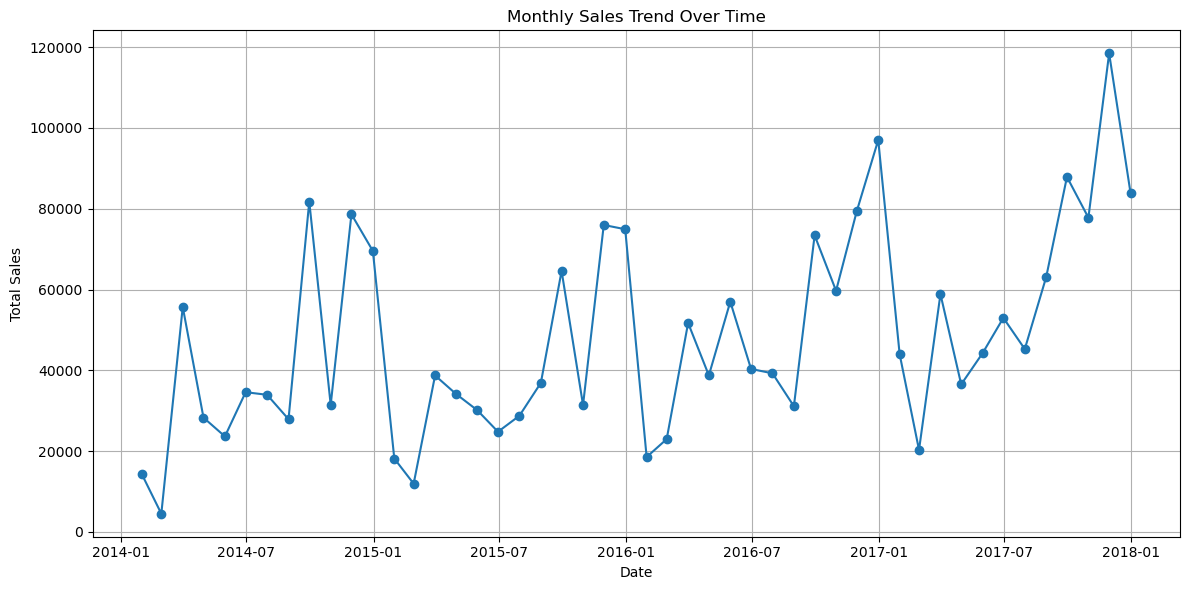

In [5]:
# Ensure Order Date is datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Aggregate sales by month
monthly_sales = superstore_data.resample('M', on='Order Date')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

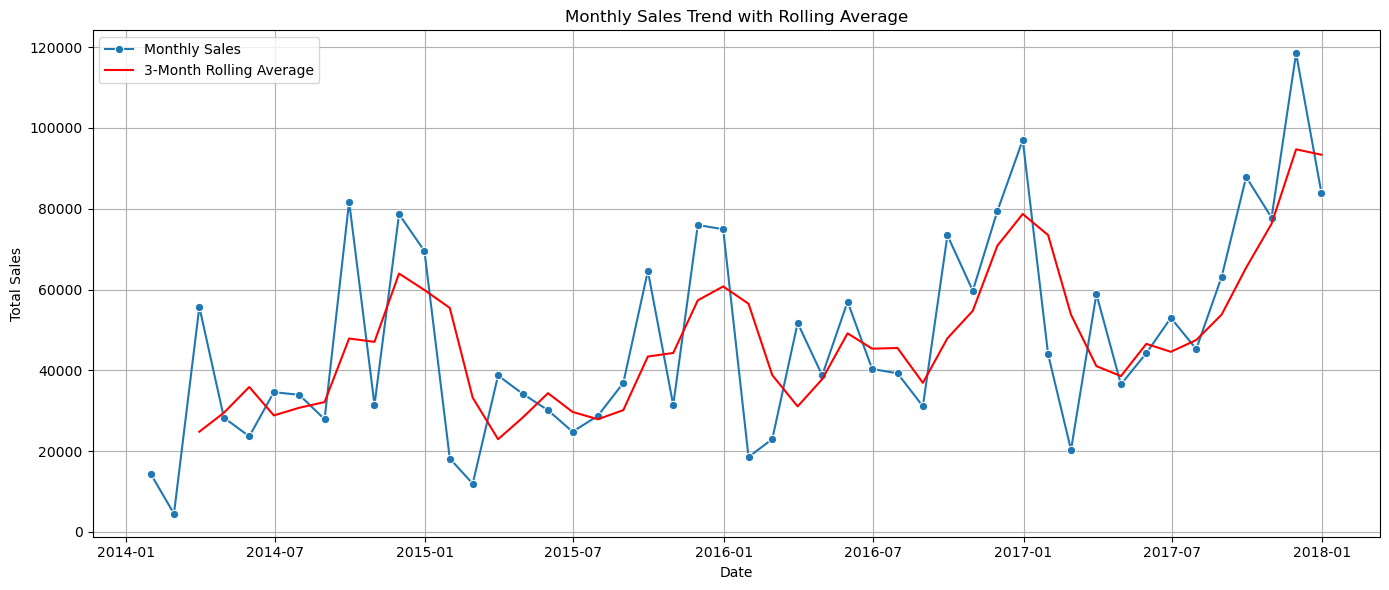

In [7]:
# Convert to datetime if not already
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Aggregate monthly sales
monthly_sales = superstore_data.resample('M', on='Order Date')['Sales'].sum().reset_index()

# Add a 3-month rolling average
monthly_sales['Rolling Avg'] = monthly_sales['Sales'].rolling(window=3).mean()

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Order Date', y='Sales', label='Monthly Sales', marker='o')
sns.lineplot(data=monthly_sales, x='Order Date', y='Rolling Avg', label='3-Month Rolling Average', color='red')

plt.title('Monthly Sales Trend with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

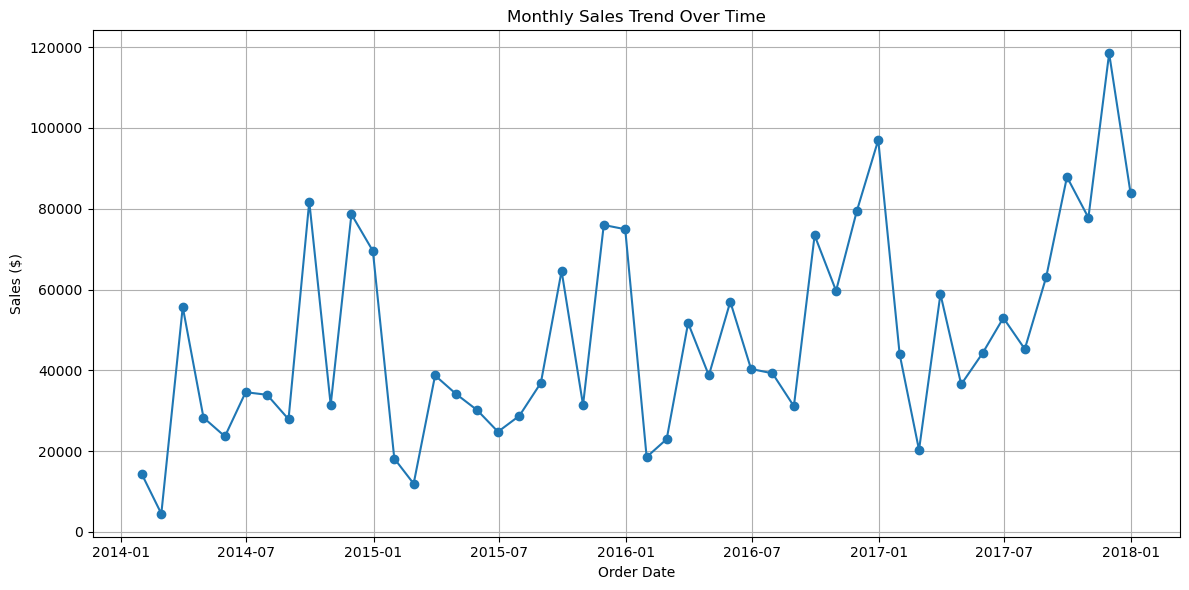

In [8]:
# Ensure Order Date is datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Group by month and sum sales
monthly_sales = superstore_data.resample('M', on='Order Date').sum(numeric_only=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

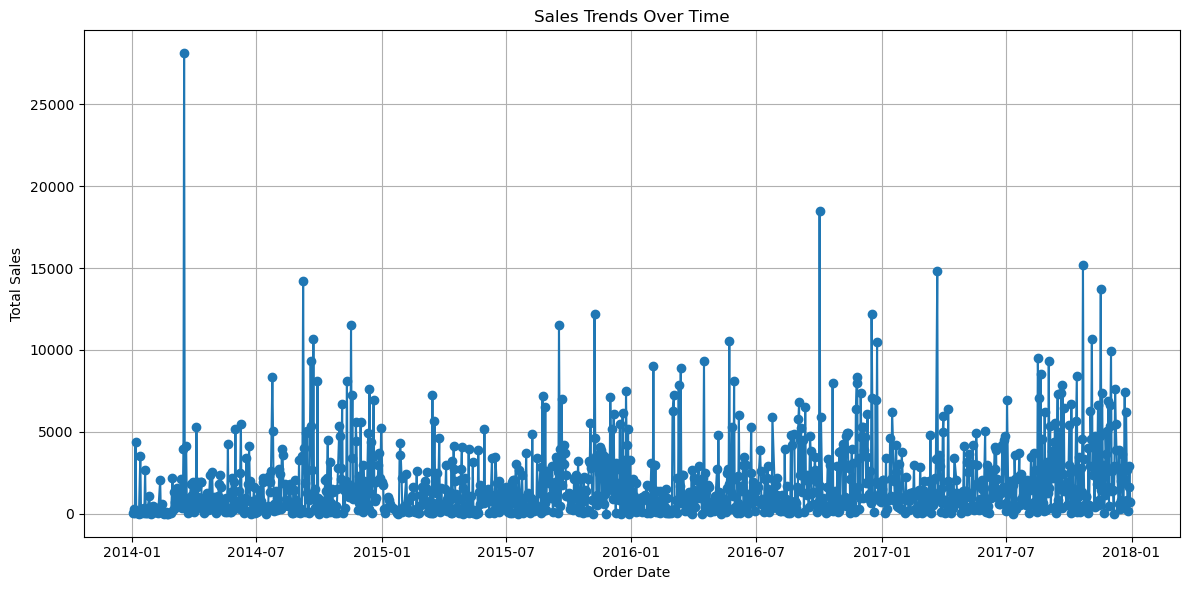

In [9]:
# Ensure 'Order Date' is in datetime format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Group data by 'Order Date' and sum the 'Sales'
sales_over_time = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Order Date'], sales_over_time['Sales'], marker='o', linestyle='-')
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

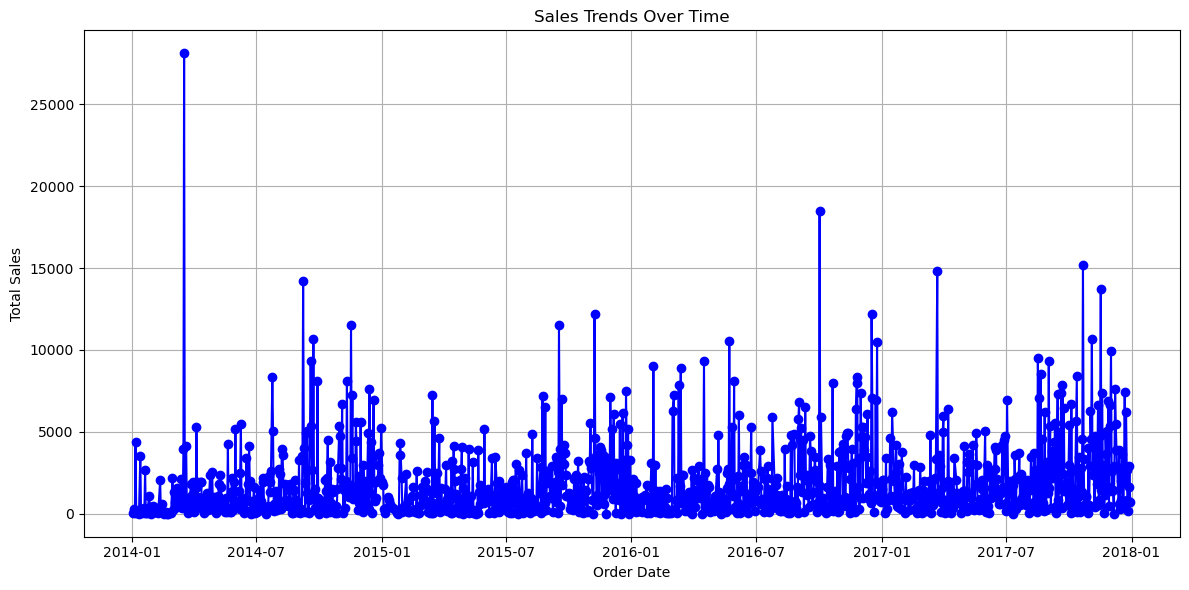

In [10]:
# Ensure 'Order Date' is in datetime format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Group data by 'Order Date' and sum the 'Sales' for each date
daily_sales = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Plotting sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

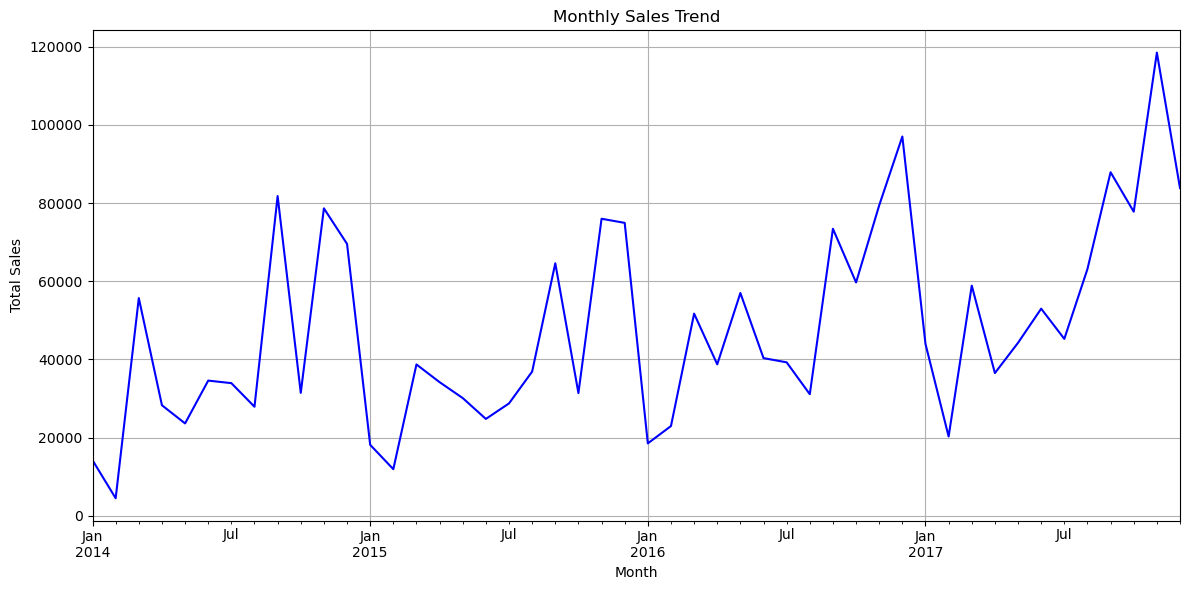

In [11]:
# Ensure 'Order Date' is set as the index and sorted
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
df_time_series = superstore_data.set_index('Order Date').sort_index()

# Resample data to get monthly sales trends
monthly_sales = df_time_series['Sales'].resample('M').sum()

# Plotting the sales trend over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', title='Monthly Sales Trend', xlabel='Month', ylabel='Total Sales', color='blue')
plt.grid(True)
plt.tight_layout()
plt.show()

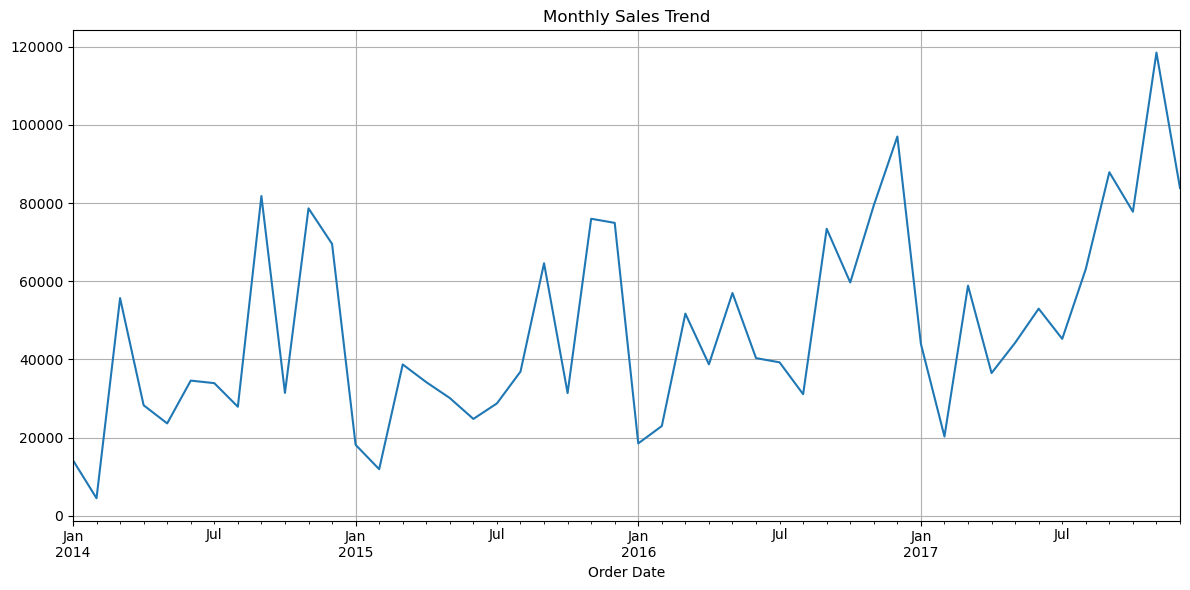

In [12]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
df = superstore_data.set_index('Order Date')

# Resample data to get total sales per month
monthly_sales = df['Sales'].resample('M').sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel = ('Month')
plt.ylabel = ('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

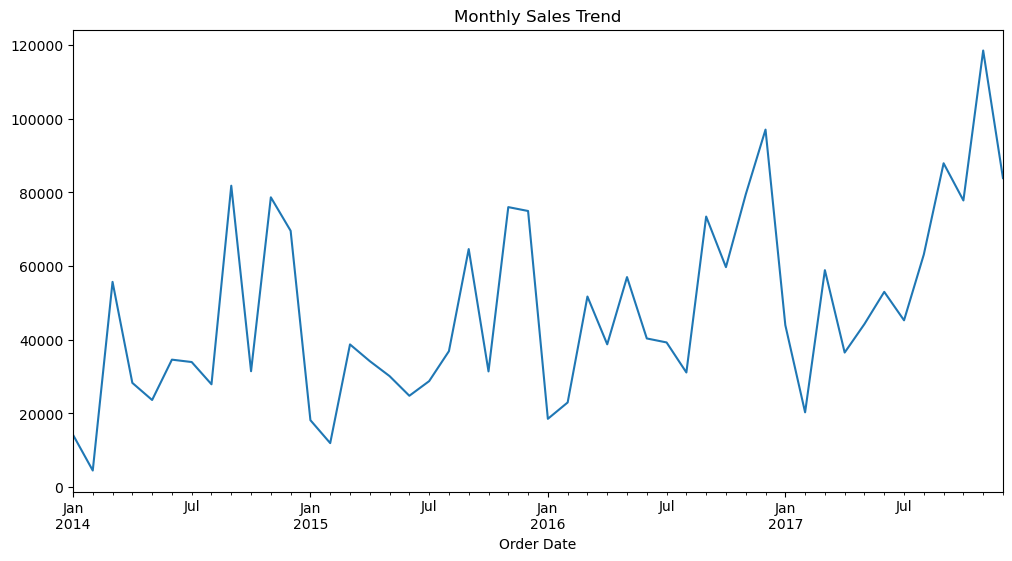

In [13]:
superstore_data_sorted = superstore_data.set_index('Order Date').sort_index()

# Resample data by month and sum sales
monthly_sales = superstore_data_sorted['Sales'].resample('M').sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

TypeError: 'str' object is not callable

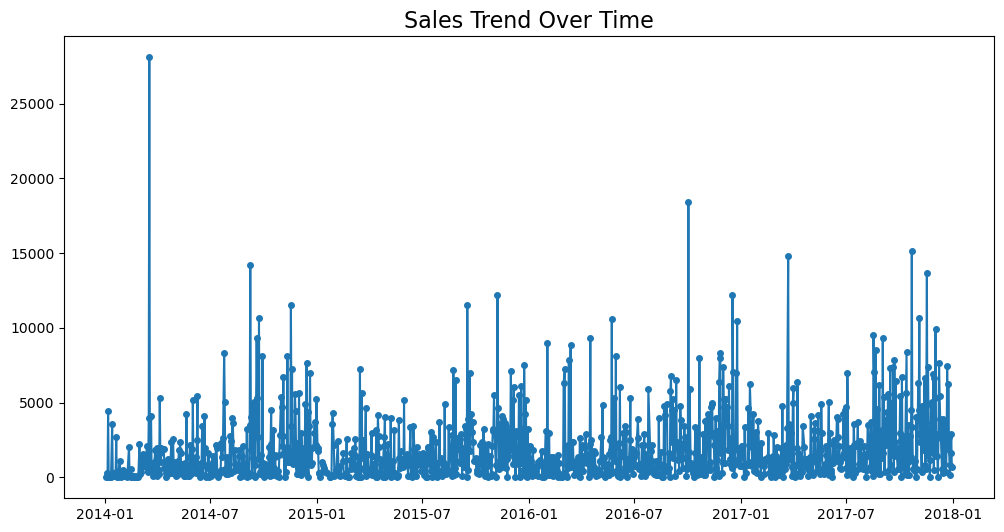

In [14]:
# Ensure 'Order Date' is in datetime format for proper time-series plotting
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Group by 'Order Date' and sum 'Sales' to get total sales for each day
sales_over_time = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Sort the data by 'Order Date' to ensure the trend is plotted correctly chronologically
sales_over_time = sales_over_time.sort_values(by='Order Date')

# Plotting the sales trend over time using a line plot
plt.figure(figsize=(12, 6)) # Set the figure size for better readability
plt.plot(sales_over_time['Order Date'], sales_over_time['Sales'], marker='o', linestyle='-', markersize=4)
plt.title('Sales Trend Over Time', fontsize=16) # Add a title to the plot
plt.xlabel('Order Date', fontsize=12) # Label for the x-axis
plt.ylabel('Total Sales', fontsize=12) # Label for the y-axis
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for easier reading of values
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

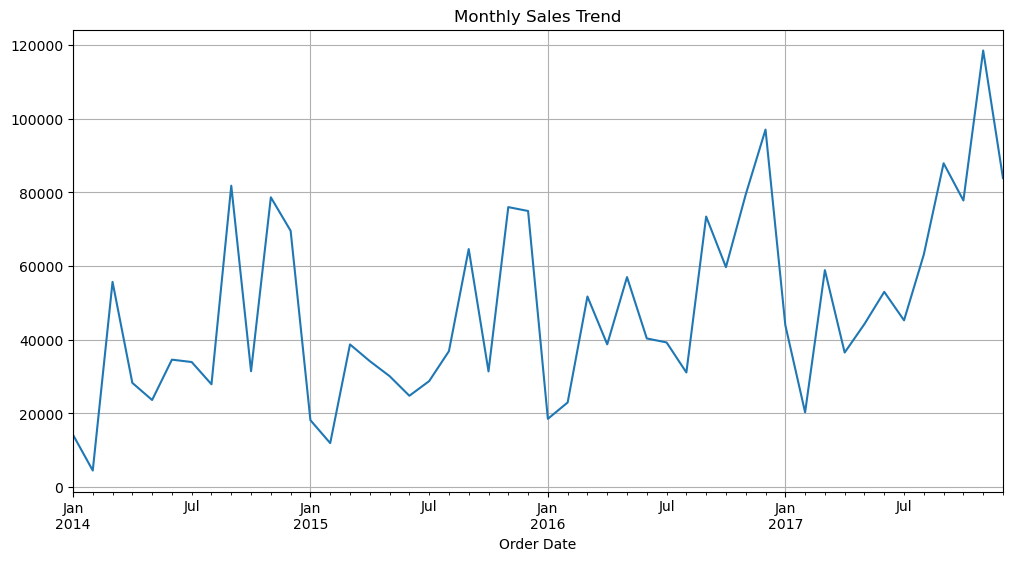

In [15]:
# Ensure 'Order Date' is set as the index for proper time-series resampling
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
df_time_series = superstore_data.set_index('Order Date')

# Resample data by month and sum the sales
monthly_sales = df_time_series['Sales'].resample('M').sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel = 'Order Date'
plt.ylabel = 'Total Sales'
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: 'str' object is not callable

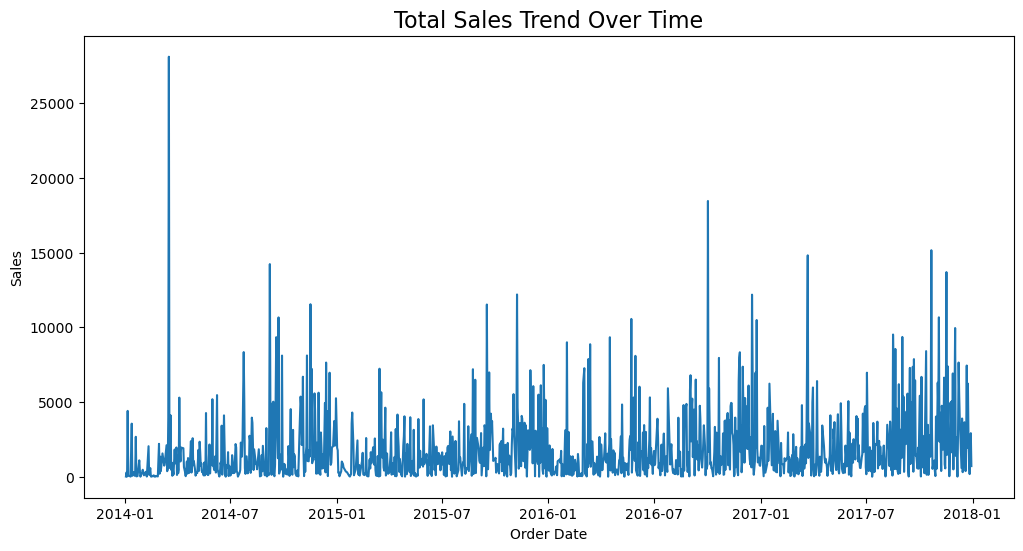

In [16]:
# Ensure 'Order Date' is in datetime format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Group data by Order Date and sum Sales for daily aggregates
daily_sales = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Sort by date
daily_sales = daily_sales.sort_values('Order Date')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Order Date', y='Sales', marker=None)
plt.title('Total Sales Trend Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: 'str' object is not callable

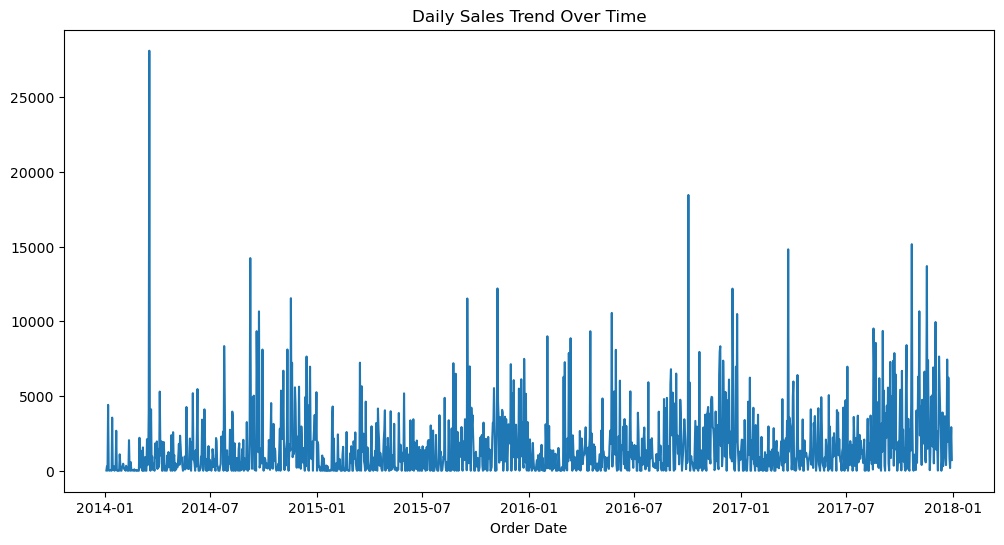

In [17]:
# Ensure 'Order Date' is set as the index and sorted
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
df_time = superstore_data.set_index('Order Date').sort_index()

# Resample data by day to get daily total sales
daily_sales = df_time['Sales'].resample('D').sum()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Daily Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

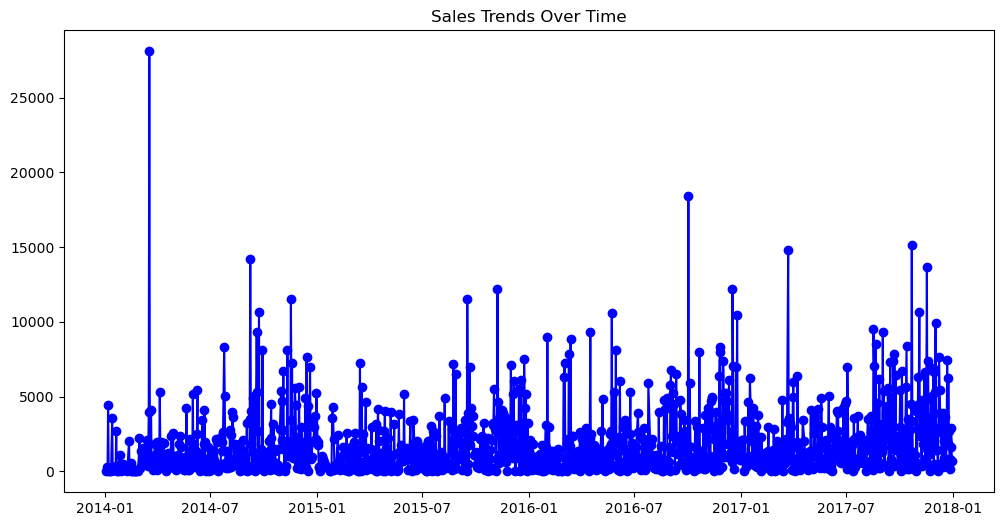

In [18]:
# Ensure 'Order Date' is in datetime format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Group data by 'Order Date' and sum the 'Sales' for each date
daily_sales = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], marker='o', linestyle='-', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

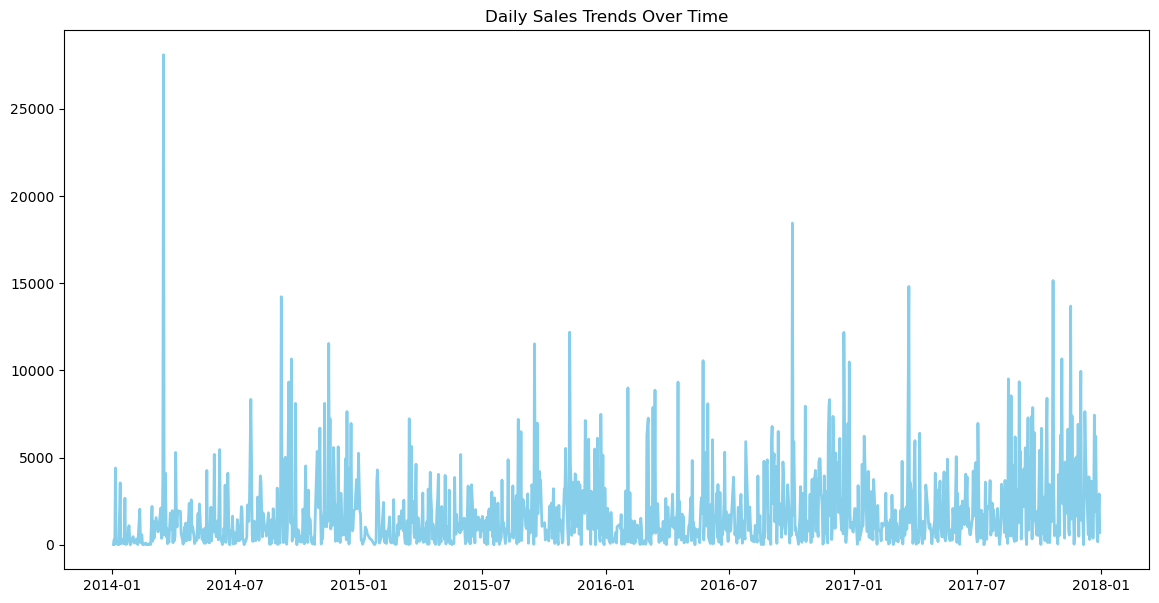

In [19]:
# Make sure 'Order Date' is in datetime format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Group by 'Order Date' and sum the 'Sales' for each day
daily_sales = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], color='skyblue', linewidth=2)
plt.title('Daily Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


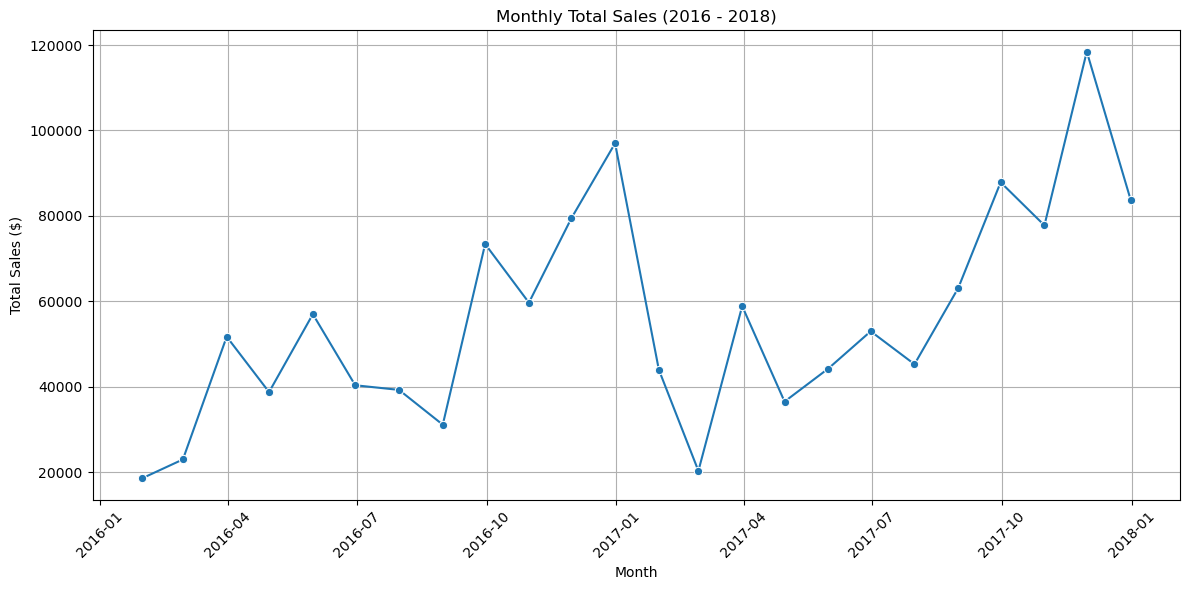

In [5]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Filter data for years 2016 to 2018
filtered_data = superstore_data[(superstore_data['Order Date'].dt.year >= 2016) & 
                                (superstore_data['Order Date'].dt.year <= 2018)]

# Resample data by month and sum up sales
monthly_sales = filtered_data.resample('M', on='Order Date')['Sales'].sum().reset_index()

# Rename columns for clarity
monthly_sales.columns = ['Month', 'Total Sales']

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Sales', data=monthly_sales, marker='o')
plt.title('Monthly Total Sales (2016 - 2018)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
df = superstore_data.set_index('Order Date')

# Filter data between 2016 and 2018
df_filtered = df['2016-01-01':'2018-12-31']

# Resample data by month and sum up the 'Sales'
monthly_sales = df_filtered.resample('M')['Sales'].sum()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Total Sales (2016 - 2018)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


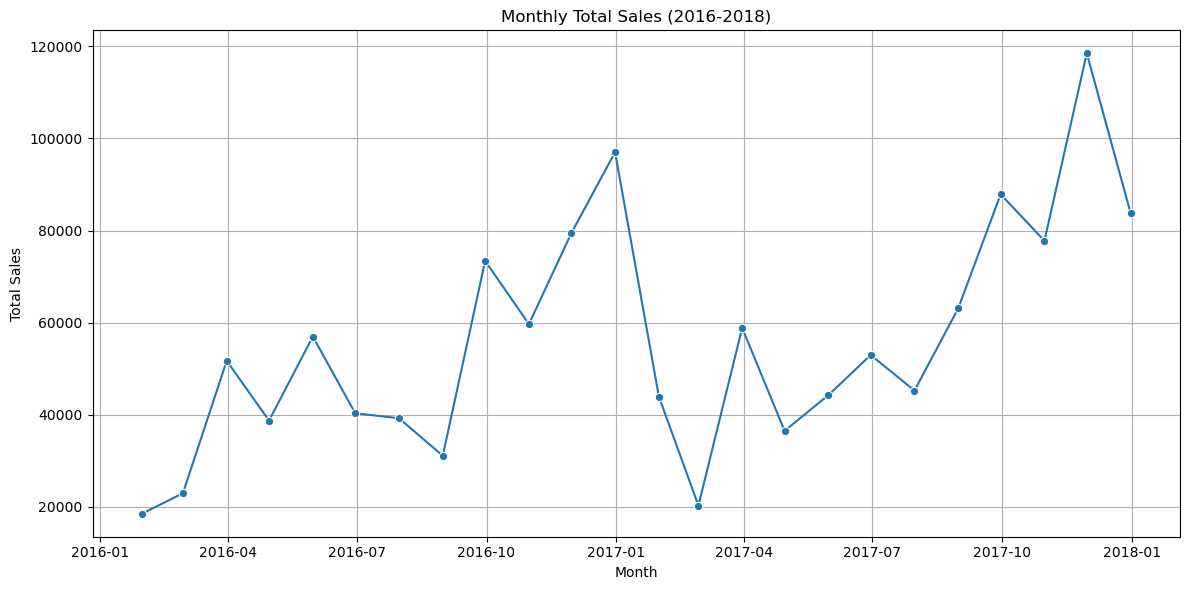

In [7]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
df = superstore_data.set_index('Order Date')

# Resample data to get monthly total sales
monthly_sales = df['Sales'].resample('M').sum()

# Filter data for years 2016 to 2018
monthly_sales = monthly_sales['2016':'2018']

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Total Sales (2016-2018)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
df = superstore_data.set_index('Order Date')

# Filter data between 2016 and 2018
df_filtered = df['2016-01-01':'2018-12-31']

# Resample to monthly frequency and sum the sales
monthly_sales = df_filtered.resample('M')['Sales'].sum()

# Plot the line chart
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Total Sales (2016–2018)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

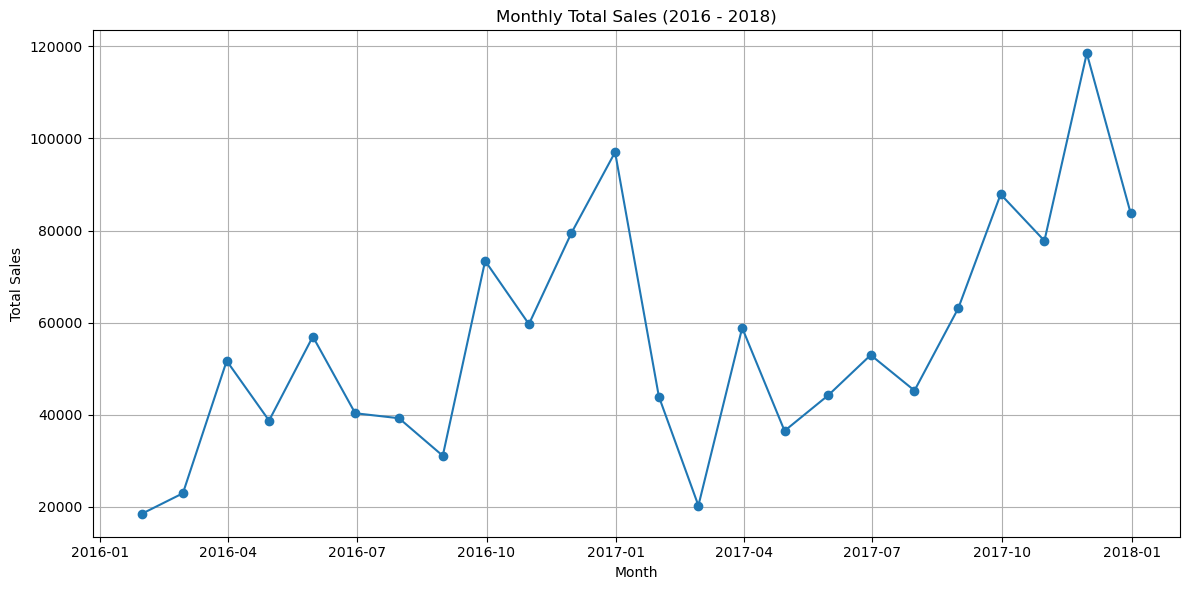

In [9]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Filter data between 2016 and 2018
filtered_data = superstore_data[(superstore_data['Order Date'].dt.year >= 2016) & 
                                (superstore_data['Order Date'].dt.year <= 2018)]

# Resample to get monthly total sales
monthly_sales = filtered_data.resample('M', on='Order Date')['Sales'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Total Sales (2016 - 2018)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

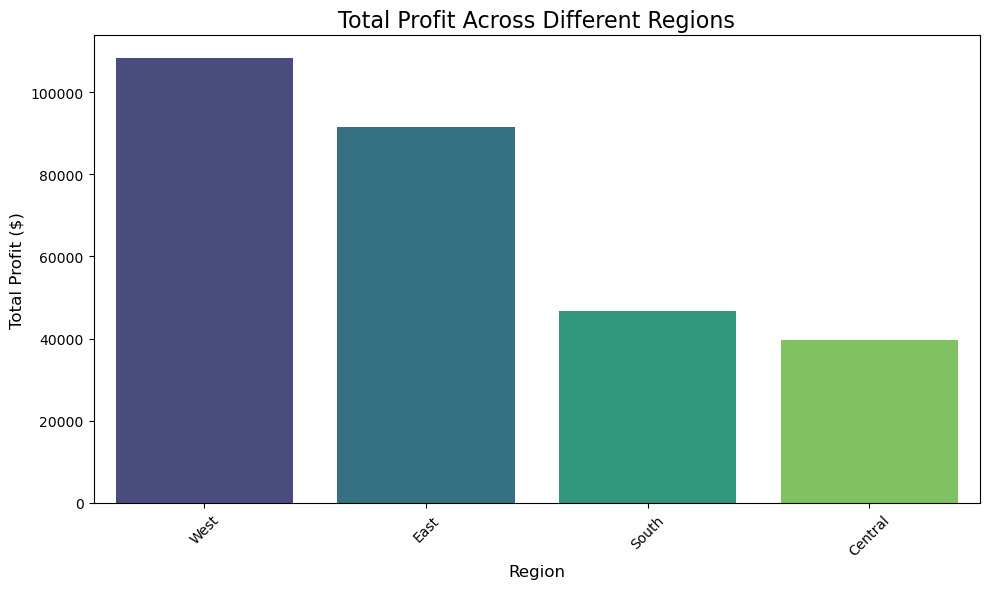

In [10]:
profit_by_region = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort for better visualization
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_region, palette='viridis')
plt.title('Total Profit Across Different Regions', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

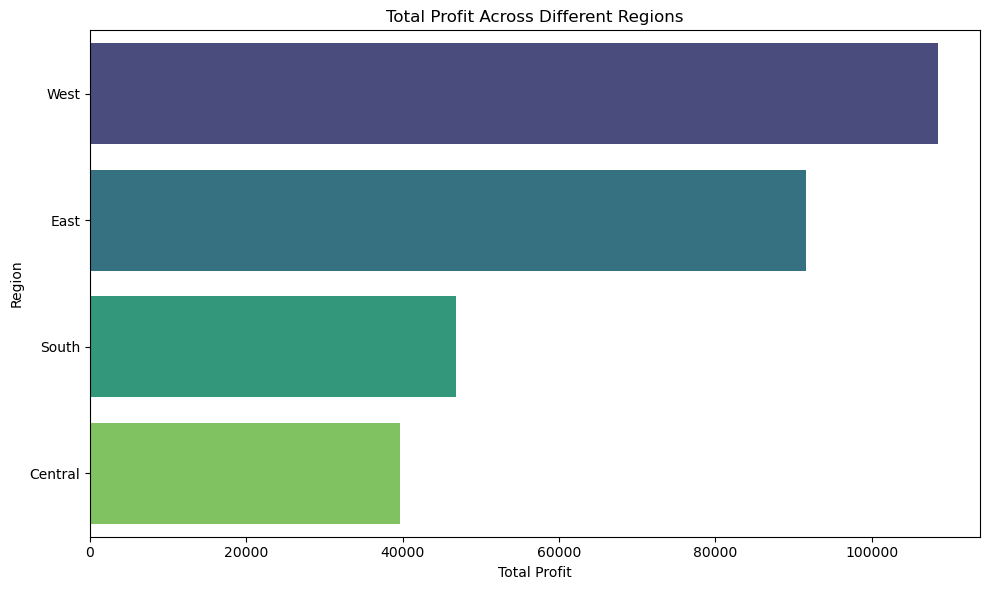

In [12]:
profit_by_region = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort regions by profit for better visualization
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Region', data=profit_by_region, palette='viridis')
plt.title('Total Profit Across Different Regions')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

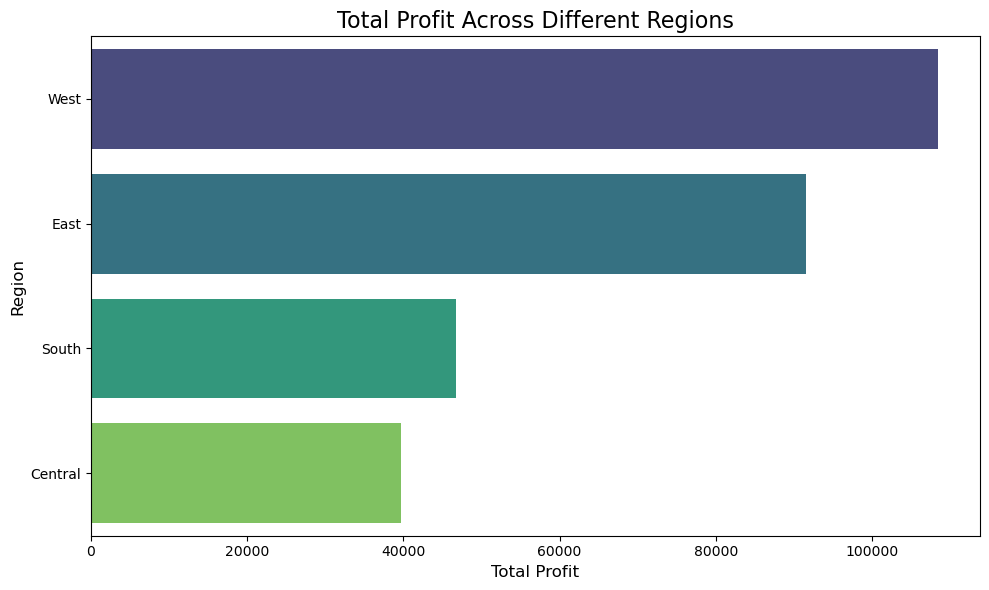

In [13]:
profit_by_region = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort regions by profit for better visualization
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Create a bar plot to visualize profit across regions
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Region', data=profit_by_region, palette='viridis')

# Add axis labels and title
plt.title('Total Profit Across Different Regions', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

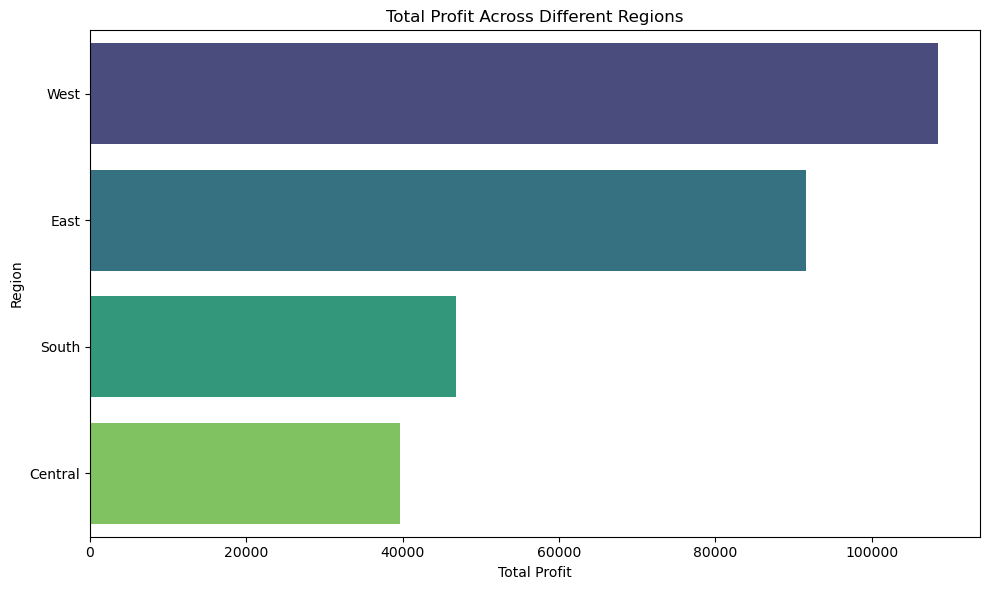

In [14]:
profit_by_region = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort the regions by profit for better visualization
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Create a bar plot to visualize profit across regions
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Region', data=profit_by_region, palette='viridis')
plt.title('Total Profit Across Different Regions')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

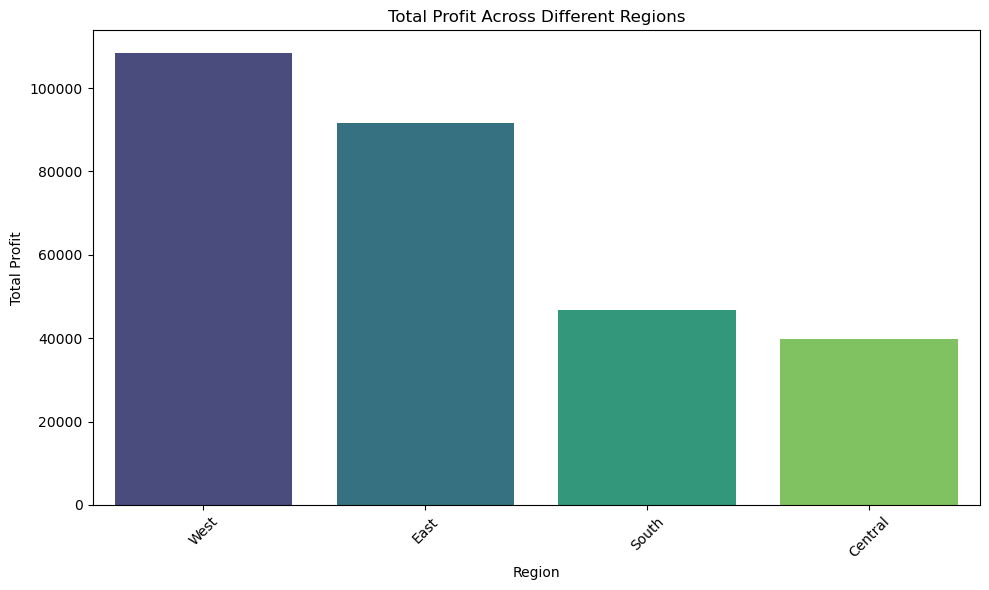

In [15]:
region_profit = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort the regions by total profit for better visualization
region_profit = region_profit.sort_values(by='Profit', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=region_profit, palette='viridis')
plt.title('Total Profit Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

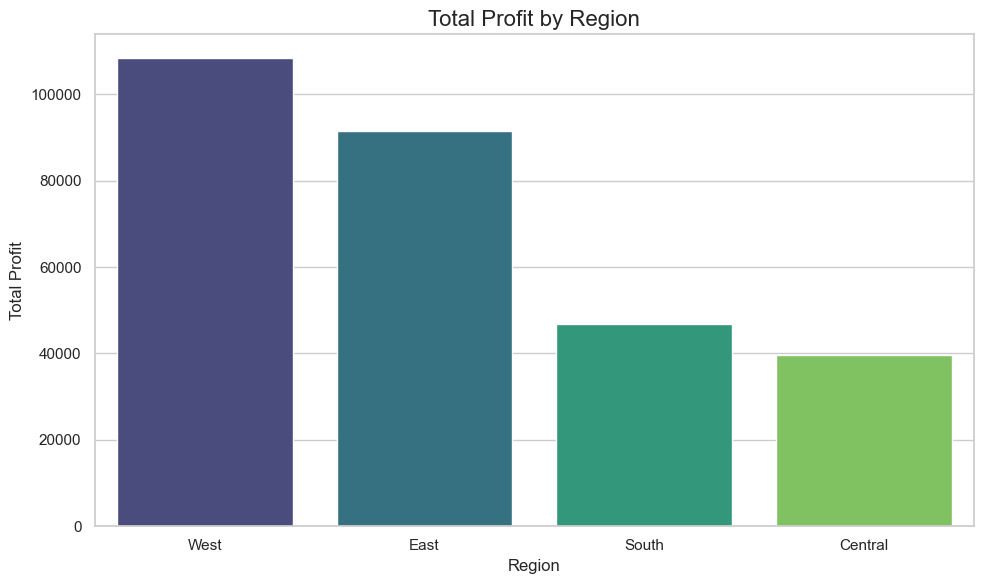

In [16]:
profit_by_region = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort the regions by profit for better visualization
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Set the visual style
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_region, palette='viridis')

# Add chart labels and title
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

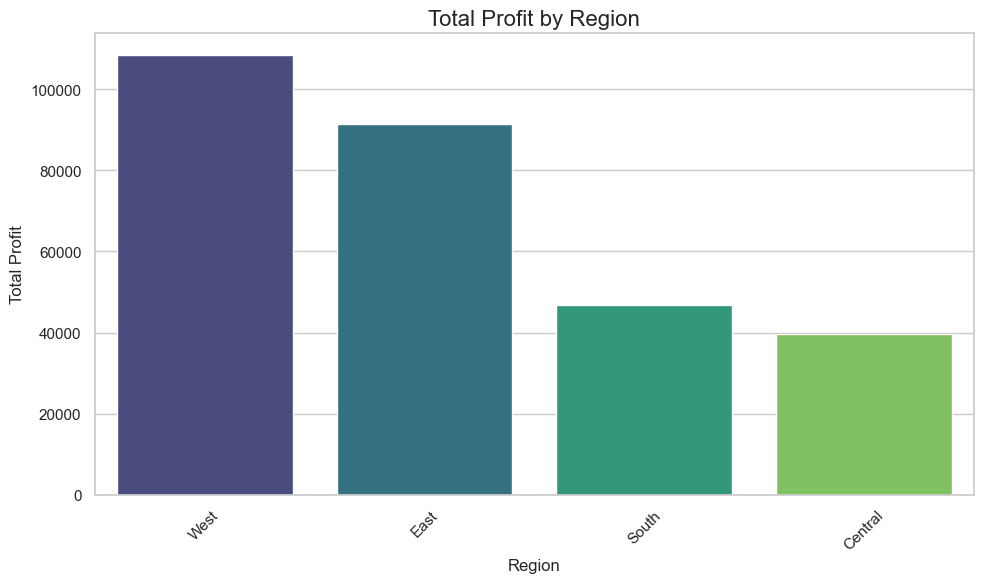

In [18]:
profit_by_region = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort the regions by profit for better visualization
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the bar chart
bar_plot = sns.barplot(x='Region', y='Profit', data=profit_by_region, palette='viridis')

# Add title and labels
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)

# Rotate x-axis labels if needed for clarity
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

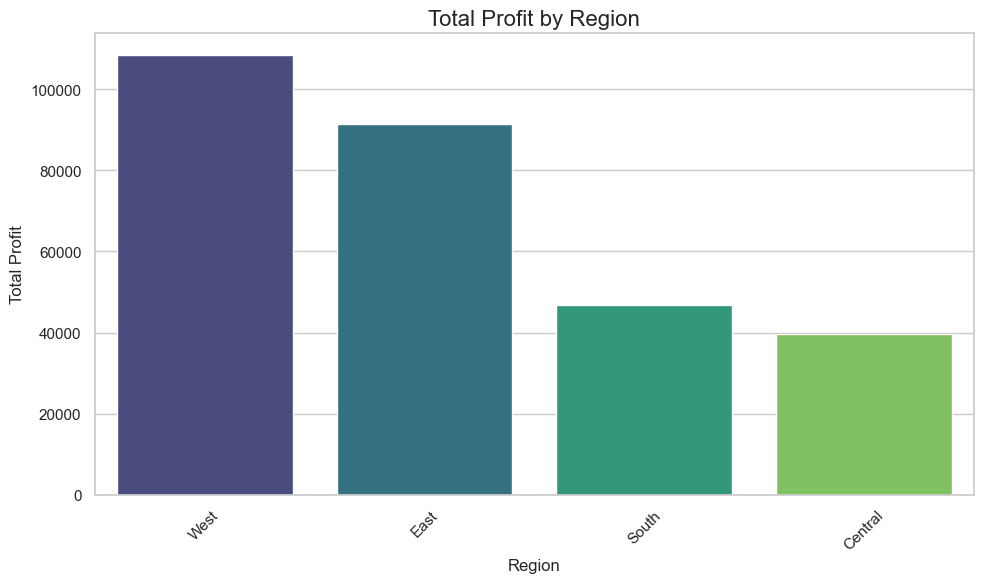

In [19]:
profit_by_region = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort the data for better visualization (optional)
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the bar chart
bar_plot = sns.barplot(x='Region', y='Profit', data=profit_by_region, palette='viridis')

# Add title and labels
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)

# Rotate x-axis labels if necessary for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

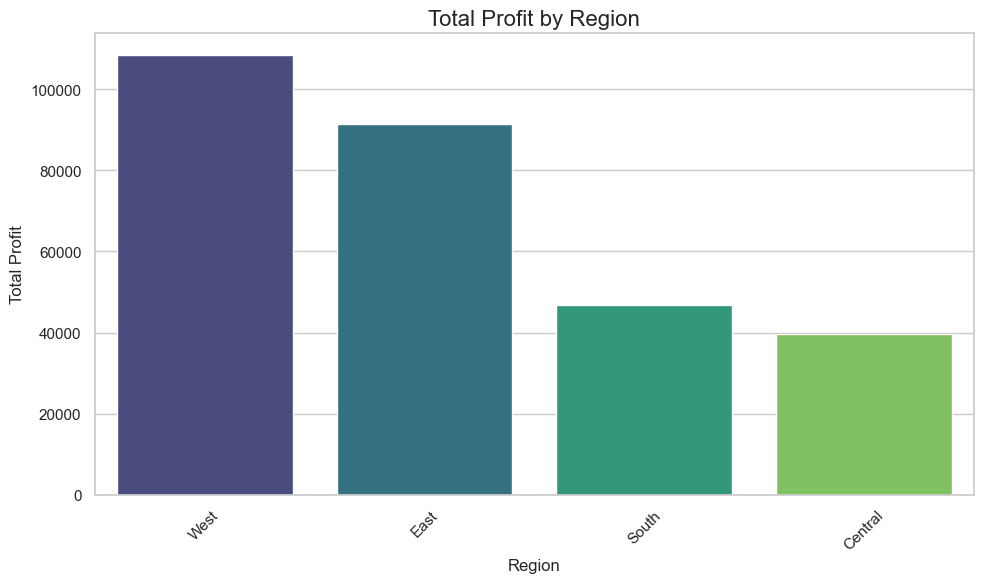

In [20]:
profit_by_region = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort the regions by profit for better visualization
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_region, palette='viridis')

# Add title and labels
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

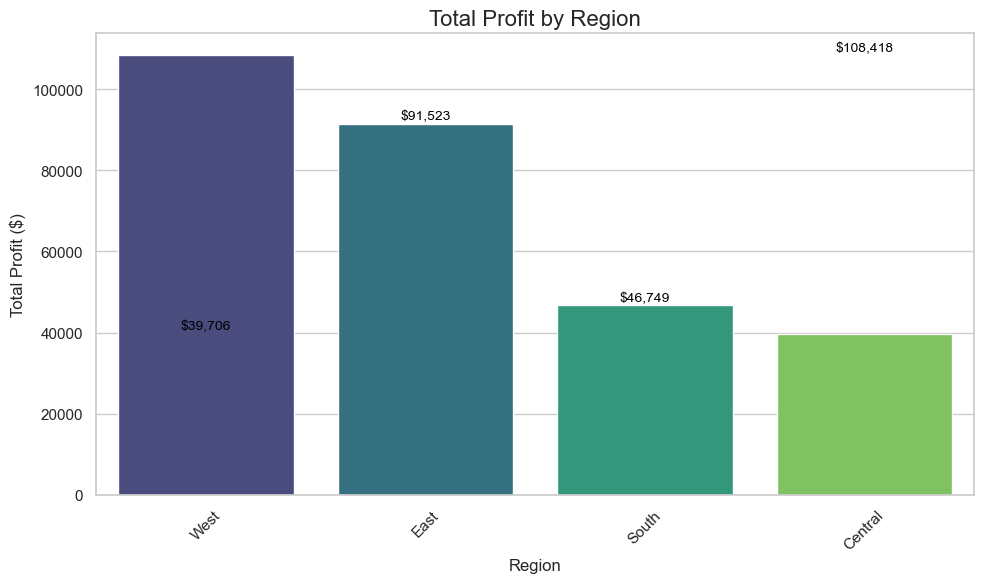

In [21]:
profit_by_region = superstore_data.groupby('Region')['Profit'].sum().reset_index()

# Sort the regions by profit for better readability
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar chart using seaborn
barplot = sns.barplot(x='Region', y='Profit', data=profit_by_region, palette='viridis')

# Add title and labels
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate bars with the exact profit values
for index, row in profit_by_region.iterrows():
    barplot.text(row.name, row['Profit'] + (max(profit_by_region['Profit']) * 0.01), 
                 f"${row['Profit']:,.0f}", color='black', ha="center", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

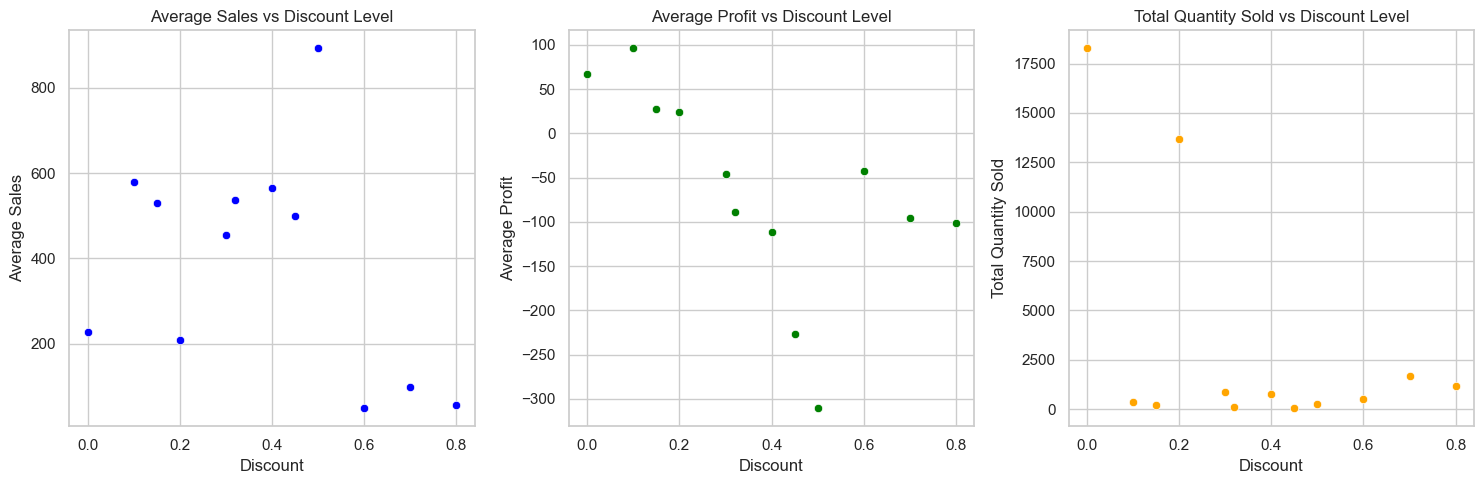

In [22]:
discount_analysis = superstore_data.groupby('Discount').agg(
    avg_sales=('Sales', 'mean'),
    avg_profit=('Profit', 'mean'),
    total_quantity=('Quantity', 'sum')
).reset_index()

# Plotting the relationship between discount and performance metrics
plt.figure(figsize=(15, 5))

# Average Sales vs Discount
plt.subplot(1, 3, 1)
sns.scatterplot(x='Discount', y='avg_sales', data=discount_analysis, color='blue')
plt.title('Average Sales vs Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Sales')

# Average Profit vs Discount
plt.subplot(1, 3, 2)
sns.scatterplot(x='Discount', y='avg_profit', data=discount_analysis, color='green')
plt.title('Average Profit vs Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Profit')

# Total Quantity Sold vs Discount
plt.subplot(1, 3, 3)
sns.scatterplot(x='Discount', y='total_quantity', data=discount_analysis, color='orange')
plt.title('Total Quantity Sold vs Discount Level')
plt.xlabel('Discount')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

C:\Users\ahgbe\AppData\Local\Temp\ipykernel_26436\1596086935.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = superstore_data.groupby('Discount Band').agg(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\an

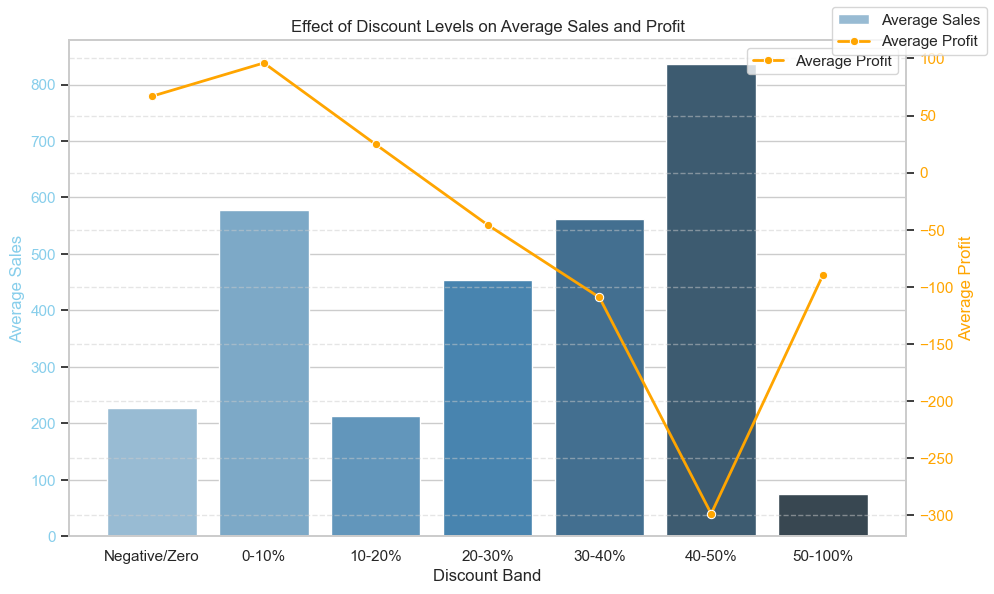

In [23]:
superstore_data['Discount Band'] = pd.cut(superstore_data['Discount'], 
                                          bins=[-1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 1], 
                                          labels=['Negative/Zero', '0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%'])

# Group data by discount band to calculate average Sales and Profit
discount_analysis = superstore_data.groupby('Discount Band').agg(
    Avg_Sales=('Sales', 'mean'),
    Avg_Profit=('Profit', 'mean')
).reset_index()

# Plotting the effect of discount bands on average sales and profit
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for average sales
ax1 = sns.barplot(x='Discount Band', y='Avg_Sales', data=discount_analysis, palette='Blues_d', label='Average Sales')
ax1.set_ylabel('Average Sales', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Twin axis for profit
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Discount Band', y='Avg_Profit', data=discount_analysis, marker='o', color='orange', linewidth=2, label='Average Profit')
ax2.set_ylabel('Average Profit', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Effect of Discount Levels on Average Sales and Profit')
plt.xlabel('Discount Band')
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
fig.legend(loc='upper right')
plt.show()

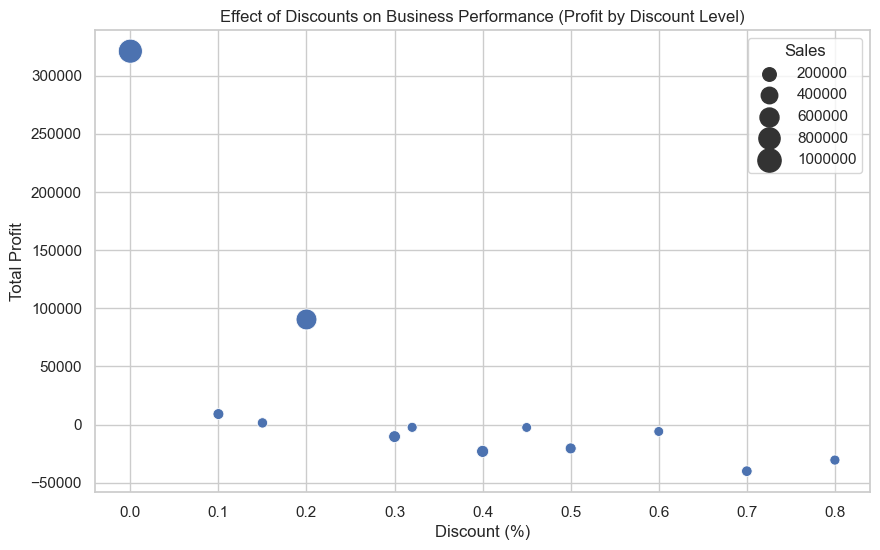

In [24]:
discount_performance = superstore_data.groupby('Discount', as_index=False).agg({
    'Profit': 'sum',
    'Sales': 'sum'
})

# Create a scatter plot to show the relationship between discount and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=discount_performance, x='Discount', y='Profit', size='Sales', legend='brief', sizes=(50, 300))
plt.title('Effect of Discounts on Business Performance (Profit by Discount Level)')
plt.xlabel('Discount (%)')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


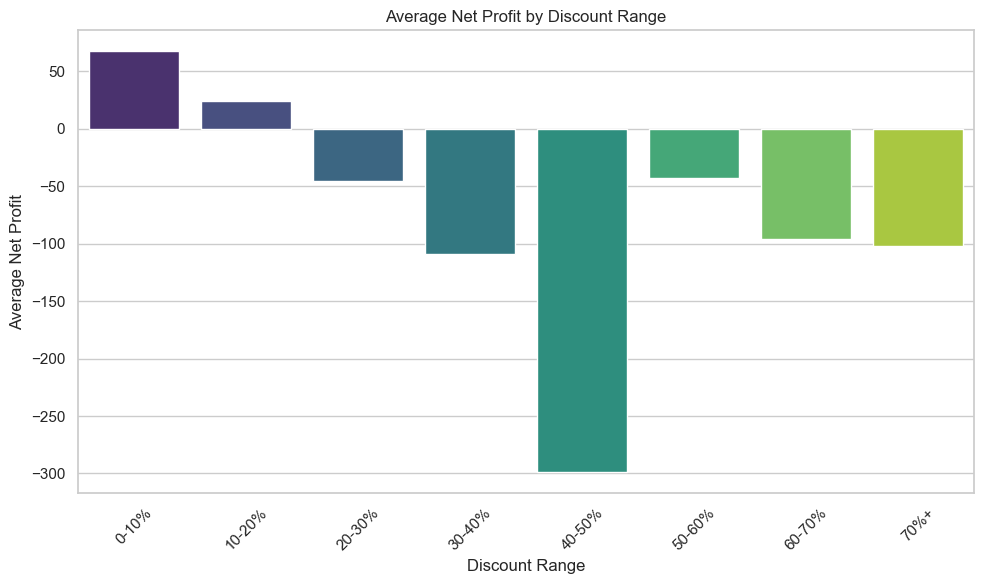

In [25]:
superstore_data['Net Profit'] = superstore_data['Profit']

# Create discount bins/ranges for better analysis
discount_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0]
discount_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70%+']

superstore_data['Discount Range'] = pd.cut(superstore_data['Discount'], bins=discount_bins, labels=discount_labels, include_lowest=True)

# Group data by discount range to calculate average net profit
discount_profit = superstore_data.groupby('Discount Range', observed=False)['Net Profit'].mean().reset_index()

# Bar plot showing average net profit per discount range
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount Range', y='Net Profit', data=discount_profit, palette='viridis')
plt.title('Average Net Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Net Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

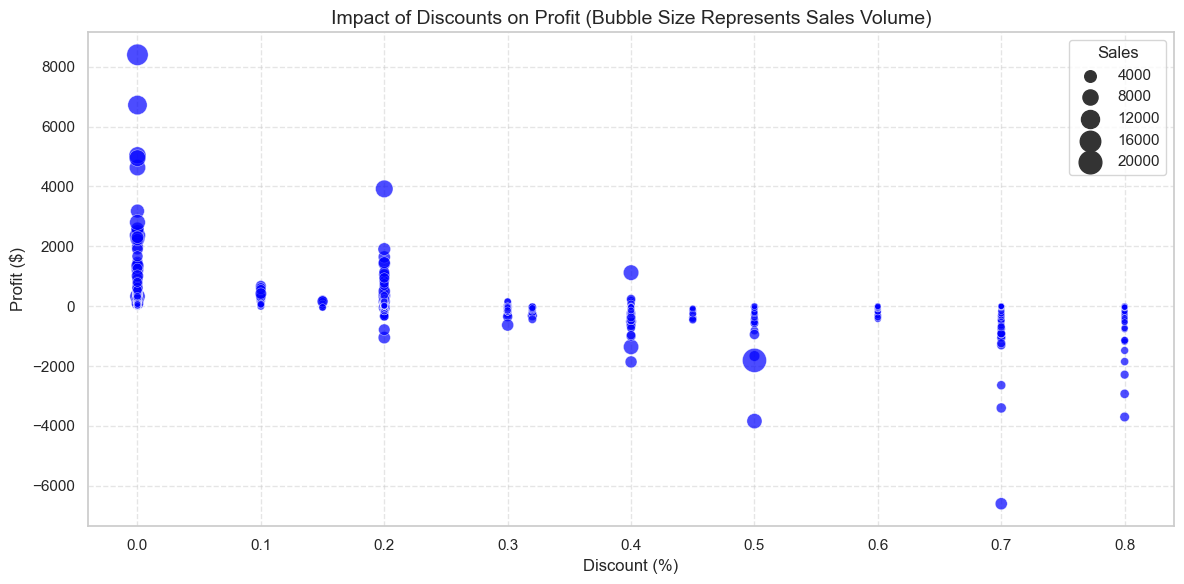

In [26]:
discount_performance = superstore_data[['Discount', 'Profit', 'Sales']]

# Scatter plot to visualize the impact of discounts on profit, with point sizes based on sales
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=discount_performance,
    x='Discount',
    y='Profit',
    size='Sales',
    sizes=(20, 300),
    alpha=0.7,
    color='blue'
)

# Add titles and labels
plt.title('Impact of Discounts on Profit (Bubble Size Represents Sales Volume)', fontsize=14)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)

# Improve formatting
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show legend for bubble size
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles, labels, title="Sales", loc="upper right")

# Display the plot
plt.show()

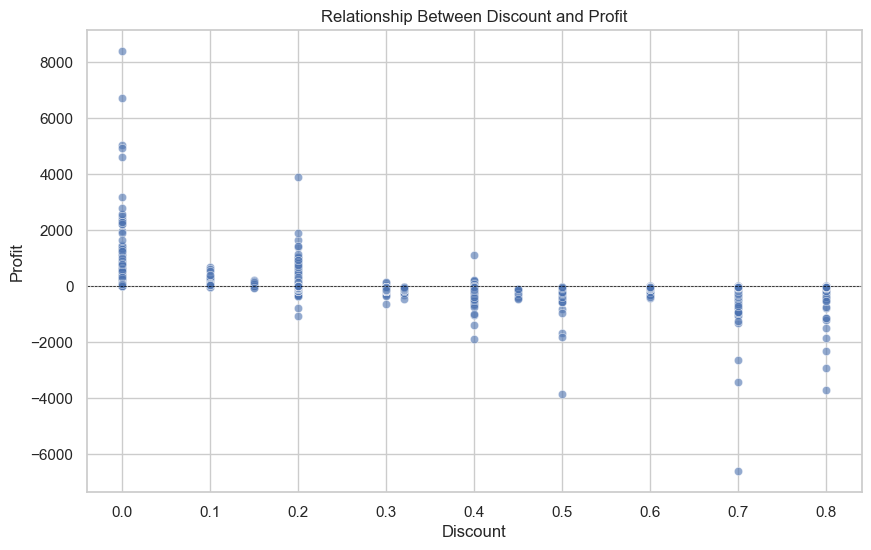

In [27]:
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=superstore_data, alpha=0.6)
plt.title('Relationship Between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add a line at zero profit for reference
plt.show()

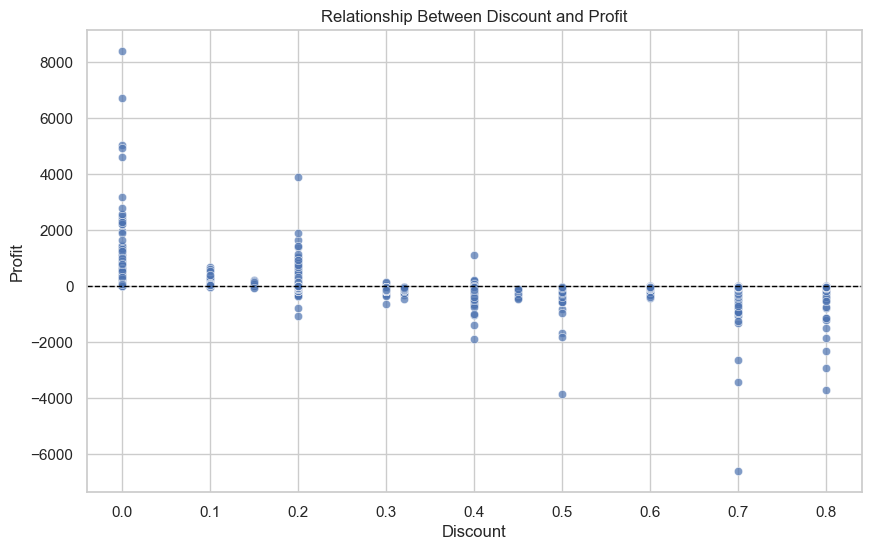

In [28]:
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=superstore_data, alpha=0.7)
plt.title('Relationship Between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at zero profit
plt.show()

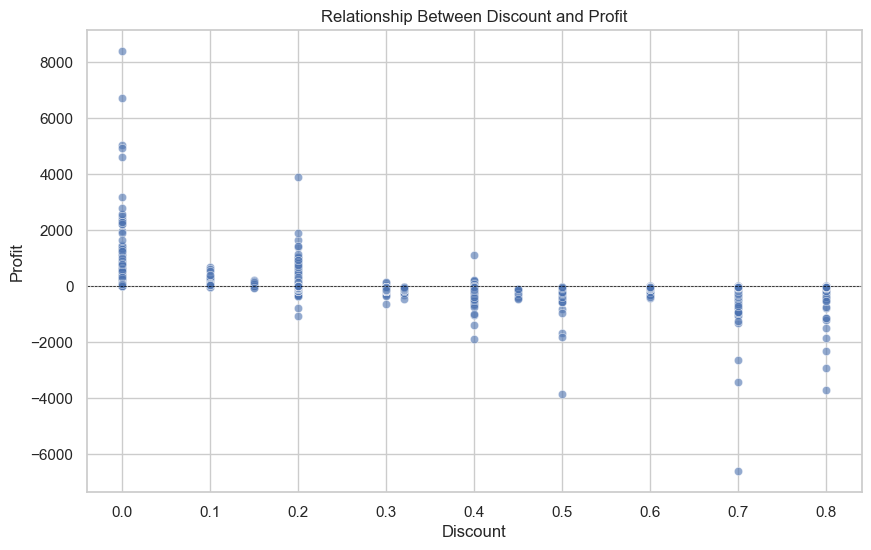

In [29]:
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=superstore_data, alpha=0.6)
plt.title('Relationship Between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Reference line at y=0 for profit
plt.show()

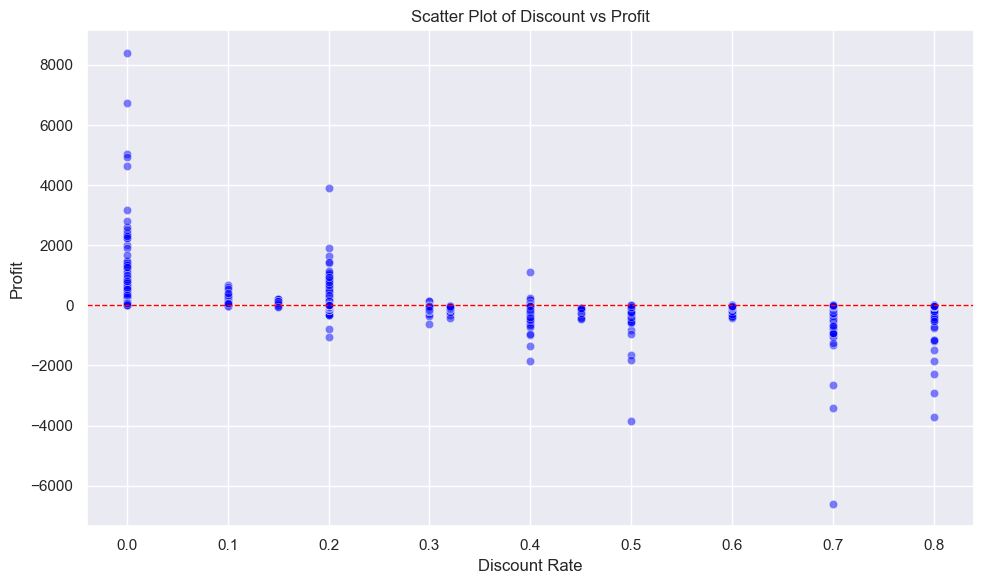

In [30]:
sns.set(style='darkgrid')

# Create a scatter plot to explore the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=superstore_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Discount vs Profit')
plt.xlabel('Discount Rate')
plt.ylabel('Profit')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Highlight zero-profit line
plt.tight_layout()
plt.show()

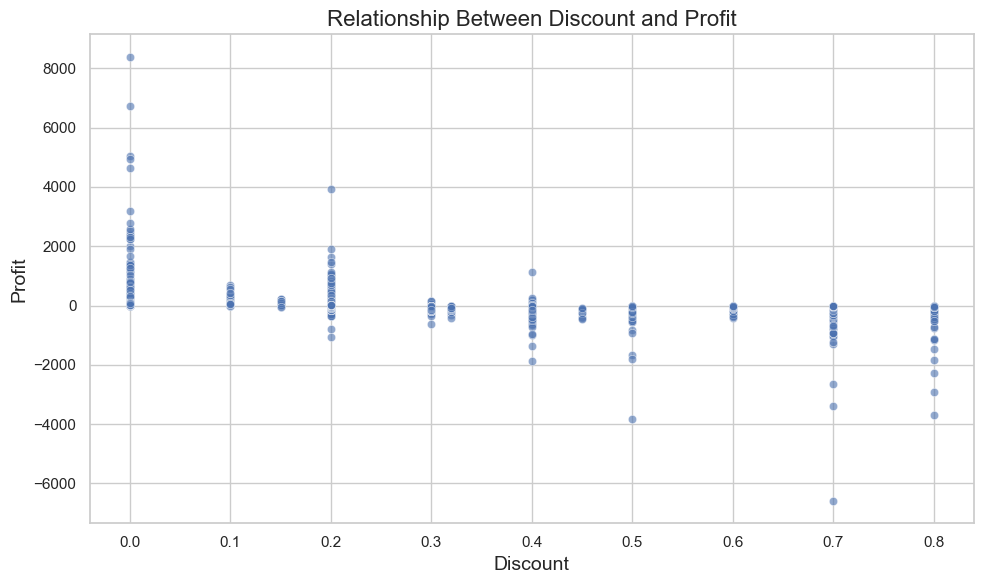

In [32]:
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='Discount',
    y='Profit',
    data=superstore_data,
    alpha=0.6
)

# Add title and labels
scatter.set_title('Relationship Between Discount and Profit', fontsize=16)
scatter.set_xlabel('Discount', fontsize=14)
scatter.set_ylabel('Profit', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


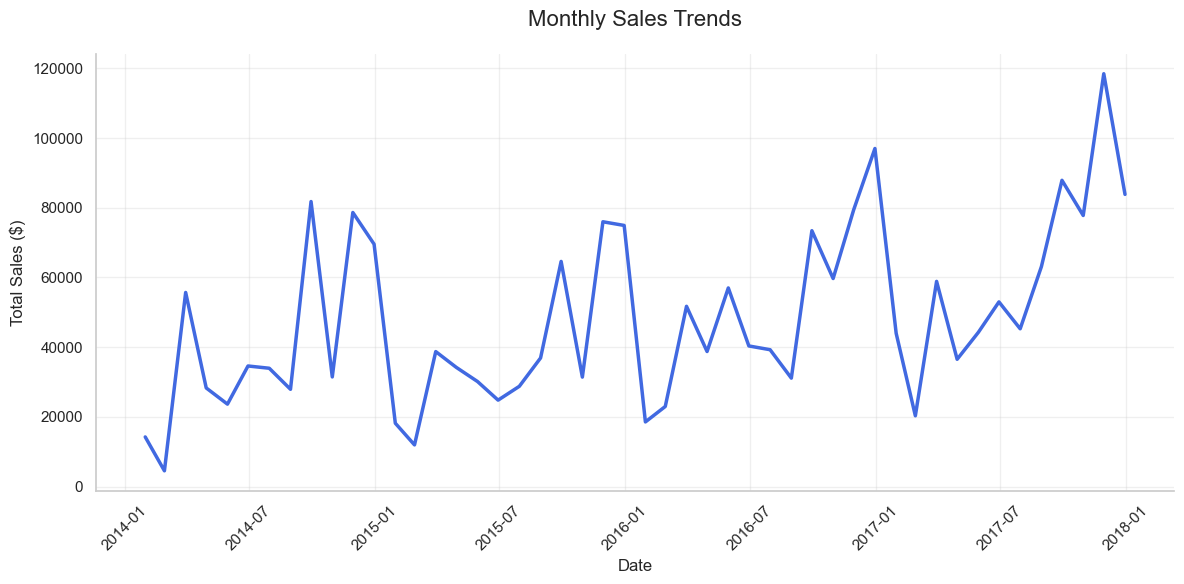

In [33]:
monthly_sales = superstore_data.resample('M', on='Order Date')['Sales'].sum()

# Create figure
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, 
             color='royalblue', linewidth=2.5)

# Formatting
plt.title('Monthly Sales Trends', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(alpha=0.3)
sns.despine()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()